In [7]:
# Langkah 1: Mengimpor Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Jika data dari file lokal
file_path = "fetal_health.csv"  # Ganti dengan path file Anda
df = pd.read_csv(file_path)


In [9]:
df = pd.read_csv("fetal_health.csv")

In [10]:
#menelaah data
print("Menampilkan 5 data teratas:")
print(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())


Menampilkan 5 data teratas:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0     

In [11]:
#Memvalidasi data
print("\nMemeriksa nilai yang hilang:")
print(df.isnull().sum())

print("\nMemeriksa data duplikat:")
print(df.duplicated().sum())



Memeriksa nilai yang hilang:
baseline value                                              0
accelerations                                               0
fetal_movement                                              0
uterine_contractions                                      212
light_decelerations                                         0
severe_decelerations                                        0
prolongued_decelerations                                  212
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                        0
percentage_of_time_with_abnormal_long_term_variability      0
mean_value_of_long_term_variability                         0
histogram_width                                             0
histogram_min                                               0
histogram_max                                               0
histogram_number_of_peaks                                   0
histogram_number_of_zeroes              

In [12]:
#Membersihkan data
df = df.drop_duplicates()
print(f"\nJumlah data setelah menghapus duplikasi: {df.shape[0]} baris")

if df.isnull().sum().any():
    df = df.fillna(df.median())



Jumlah data setelah menghapus duplikasi: 2121 baris


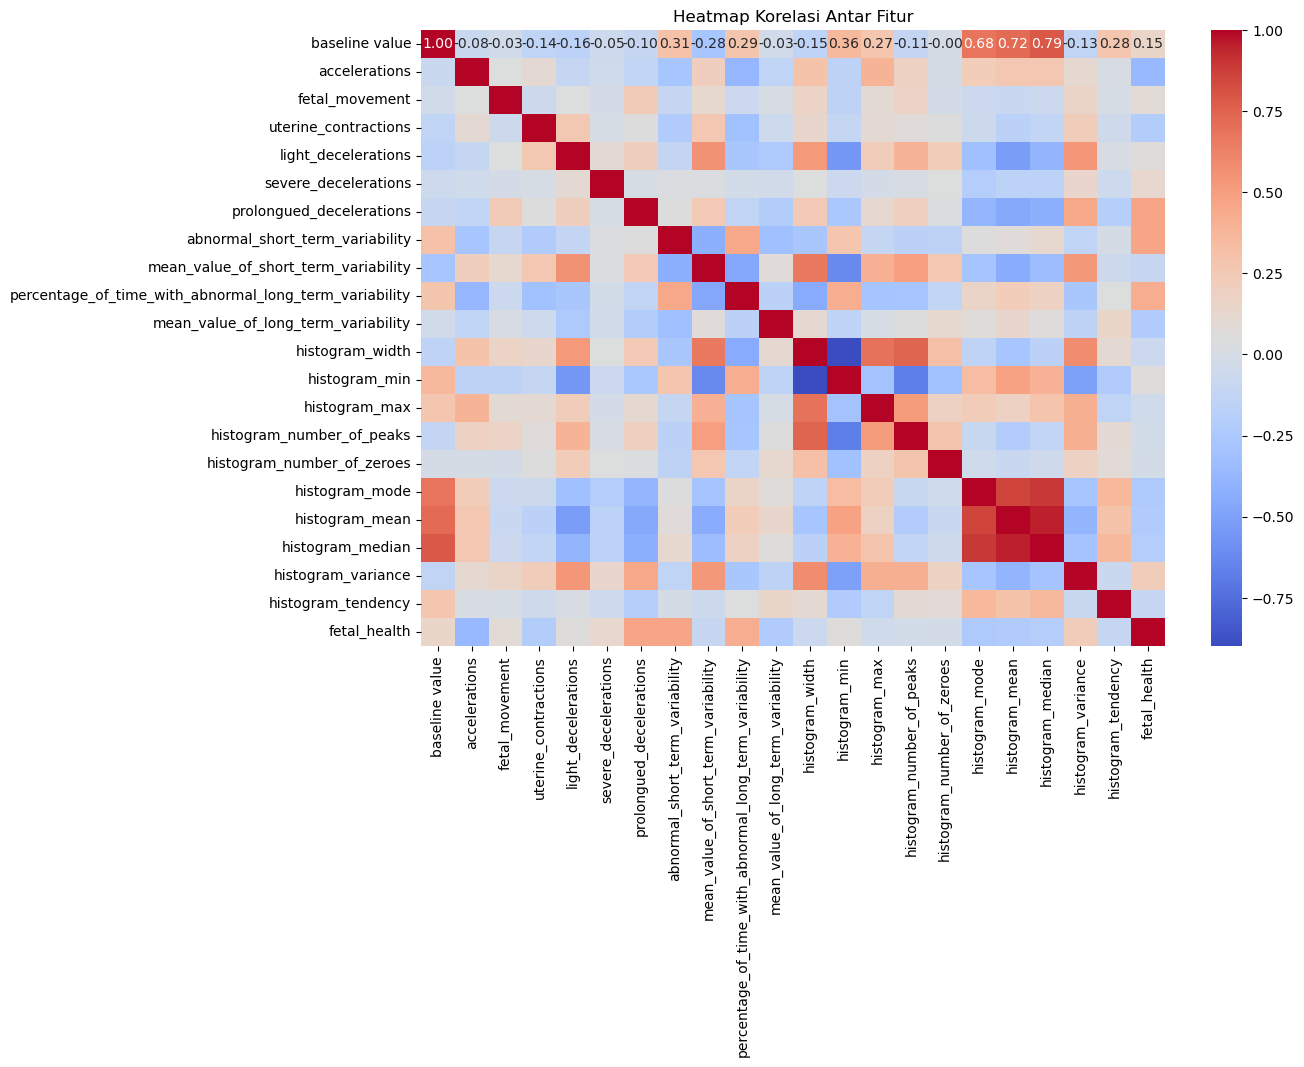

In [13]:
#Mengontruksi Data
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

X = df.drop(columns=['fetal_health'])
y = df['fetal_health']


In [14]:
#Menentukan lebel data
print("\nDistribusi label target:")
print(y.value_counts())

sns.countplot(x=y, palette='viridis')
plt.title("Distribusi Label Target")
plt.xlabel("Kelas Fetal Health")
plt.ylabel("Jumlah")
plt.show()



Distribusi label target:
fetal_health
1.0    1651
2.0     294
3.0     176
Name: count, dtype: int64


In [16]:
# Membangun Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Asumsikan X dan y sudah didefinisikan (fitur dan target)
# Contoh definisi X dan y (ganti dengan data Anda yang sebenarnya)
import pandas as pd
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'target': [0, 0, 1, 0, 1, 1, 0, 1, 1, 0]}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
# Anda dapat melanjutkan dengan evaluasi atau prediksi menggunakan model

Model berhasil dilatih.


In [18]:
y_pred = model.predict(X_test)
print("Prediksi pada data uji:", y_pred)

Prediksi pada data uji: [1 1]


Akurasi pada data uji: 0.5000
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


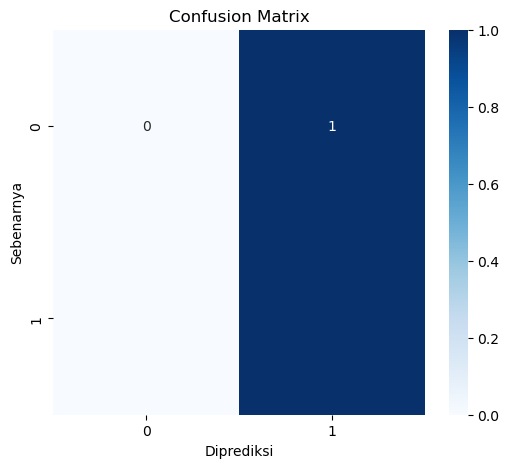

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data uji: {accuracy:.4f}")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Membuat dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Diprediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()